In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
airlines_flights_df = pd.read_csv('airlines_flights_data.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(airlines_flights_df.head())

airlines_flights_df.describe()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


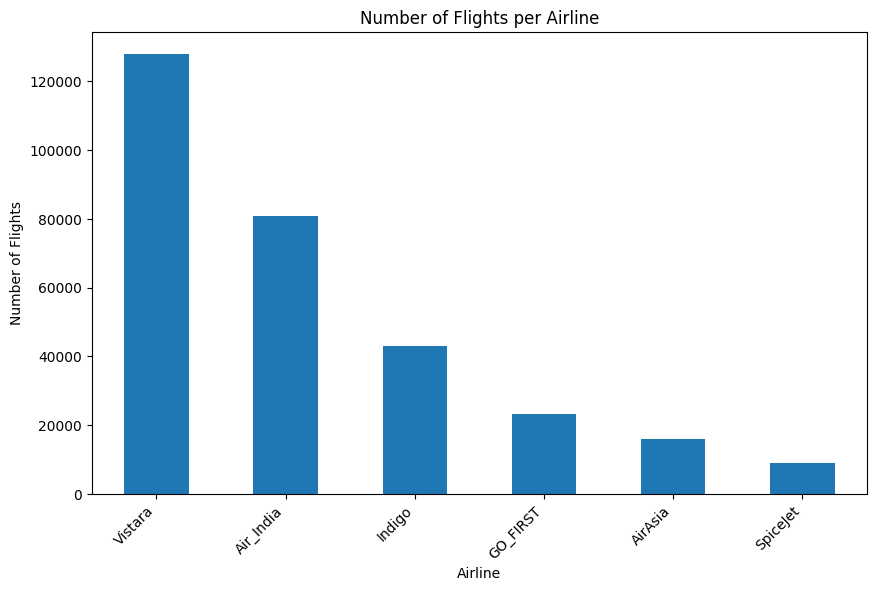

In [8]:
airlines_flights_df.airline.value_counts()

# Create bar graph
airline_counts = airlines_flights_df.airline.value_counts()

airline_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha = 'right')
plt.show()


In [12]:
airlines_flights_df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Text(0.5, 1.0, 'Departure Time Comparison')

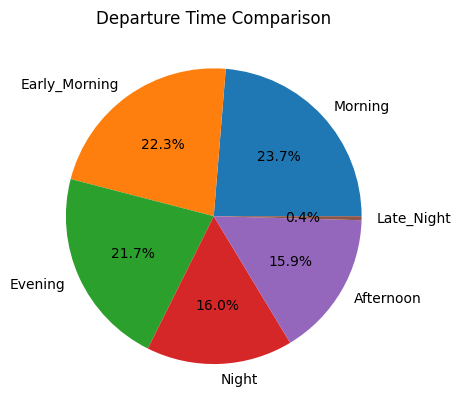

In [ ]:
departure_time_counts = airlines_flights_df.departure_time.value_counts()
plt.pie(
    departure_time_counts,
    labels=departure_time_counts.index,       # airline names
    autopct='%1.1f%%'                 # percentage format
)
plt.title("Departure Time Comparison")


In [21]:
airlines_flights_df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

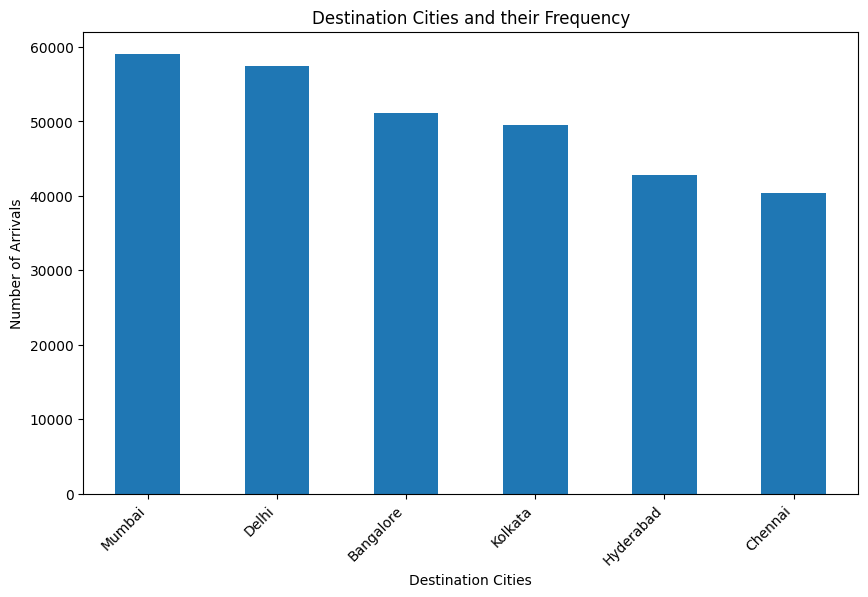

In [22]:
destination_counts = airlines_flights_df.destination_city.value_counts()

# Create bar graph
destination_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Destination Cities and their Frequency")
plt.xlabel("Destination Cities")
plt.ylabel("Number of Arrivals")
plt.xticks(rotation=45, ha = 'right')
plt.show()